# Dijkstra’s Algorithm in Python

Credit:
1. https://www.udacity.com/blog/2021/10/implementing-dijkstras-algorithm-in-python.html

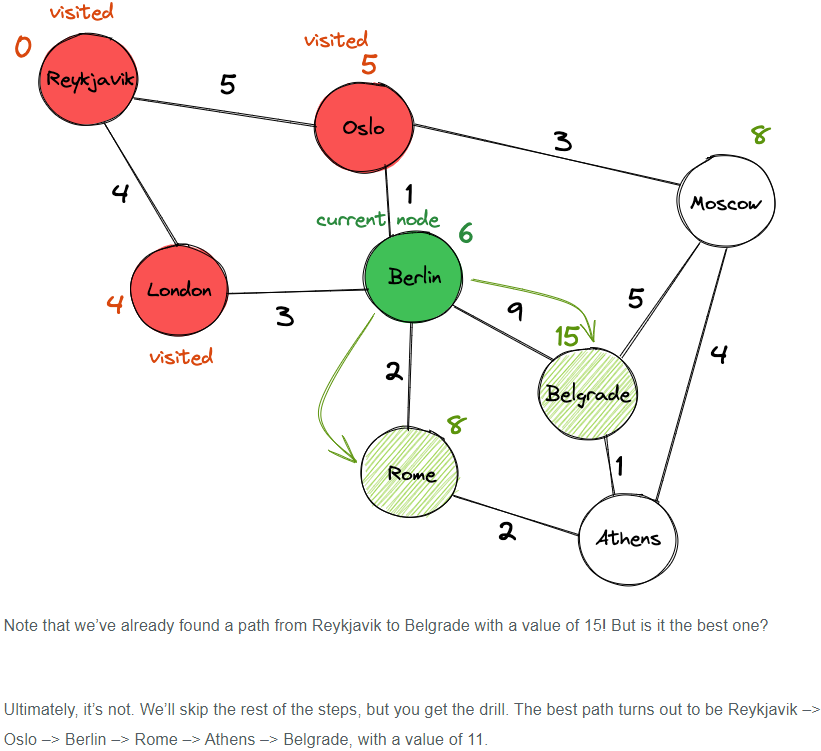

## The Graph Class
First, we’ll create the **Graph class**. This class does not cover any of the Dijkstra algorithm’s logic, but it will make the implementation of the algorithm more succinct. 

We’ll implement the graph as a **Python dictionary**. The dictionary’s **keys** will correspond to the **cities** and **its values** will correspond to *dictionaries that record the distances to other cities in the graph.* 

In [1]:
import sys
 
class Graph(object):
    def __init__(self, nodes, init_graph):
        self.nodes = nodes
        self.graph = self.construct_graph(nodes, init_graph)
        
    def construct_graph(self, nodes, init_graph):
        '''
        This method makes sure that the graph is symmetrical. In other words, 
        if there's a path from node A to B with a value V, there needs to be a 
        path from node B to node A with a value V.
        '''
        graph = {}
        for node in nodes:
            graph[node] = {}
        
        graph.update(init_graph)
        
        for node, edges in graph.items():
            for adjacent_node, value in edges.items():
                if graph[adjacent_node].get(node, False) == False:
                    graph[adjacent_node][node] = value
                    
        return graph
    
    def get_nodes(self):
        "Returns the nodes of the graph."
        return self.nodes
    
    def get_outgoing_edges(self, node):
        "Returns the neighbors of a node."
        connections = []
        for out_node in self.nodes:
            if self.graph[node].get(out_node, False) != False:
                connections.append(out_node)
        return connections
    
    def value(self, node1, node2):
        "Returns the value of an edge between two nodes."
        return self.graph[node1][node2]


In [2]:
def dijkstra_algorithm(graph, start_node):
  unvisited_nodes = list(graph.get_nodes())

  shortest_path = {}
  previous_nodes = {}
  # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
  max_value = sys.maxsize
  for node in unvisited_nodes:
      shortest_path[node] = max_value
  # However, we initialize the starting node's value with 0   
  shortest_path[start_node] = 0

  while unvisited_nodes:
    current_min_node = None
    for node in unvisited_nodes: # Iterate over the nodes
      if current_min_node == None:
          current_min_node = node
      elif shortest_path[node] < shortest_path[current_min_node]:
          current_min_node = node

  # The code block below retrieves the current node's neighbors and updates their distances
  neighbors = graph.get_outgoing_edges(current_min_node)
  for neighbor in neighbors:
      tentative_value = shortest_path[current_min_node] + graph.value(current_min_node, neighbor)
      if tentative_value < shortest_path[neighbor]:
          shortest_path[neighbor] = tentative_value
          # We also update the best path to the current node
          previous_nodes[neighbor] = current_min_node

In [3]:
def print_result(previous_nodes, shortest_path, start_node, target_node):
    path = []
    node = target_node
    
    while node != start_node:
        path.append(node)
        node = previous_nodes[node]
 
    # Add the start node manually
    path.append(start_node)
    
    print("We found the following best path with a value of {}.".format(shortest_path[target_node]))
    print(" -> ".join(reversed(path)))

In [4]:
nodes = ["Reykjavik", "Oslo", "Moscow", "London", "Rome", "Berlin", "Belgrade", "Athens"]
 
init_graph = {}
for node in nodes:
    init_graph[node] = {}
    
init_graph["Reykjavik"]["Oslo"] = 5
init_graph["Reykjavik"]["London"] = 4
init_graph["Oslo"]["Berlin"] = 1
init_graph["Oslo"]["Moscow"] = 3
init_graph["Moscow"]["Belgrade"] = 5
init_graph["Moscow"]["Athens"] = 4
init_graph["Athens"]["Belgrade"] = 1
init_graph["Rome"]["Berlin"] = 2
init_graph["Rome"]["Athens"] = 2

# Time & Space Complexity

## Credit:
https://stackabuse.com/dijkstras-algorithm-in-python/

In [5]:
from queue import PriorityQueue

In [6]:
class Graph:
    def __init__(self, num_of_vertices):
        self.v = num_of_vertices
        self.edges = [[-1 for i in range(num_of_vertices)] for j in range(num_of_vertices)]
        self.visited = []

    def add_edge(self, u, v, weight):
            self.edges[u][v] = weight
            self.edges[v][u] = weight

In [7]:
def dijkstra(graph, start_vertex):
    D = {v:float('inf') for v in range(graph.v)}
    D[start_vertex] = 0

    pq = PriorityQueue()
    pq.put((0, start_vertex))

    while not pq.empty():
        (dist, current_vertex) = pq.get()
        graph.visited.append(current_vertex)

        for neighbor in range(graph.v):
            if graph.edges[current_vertex][neighbor] != -1:
                distance = graph.edges[current_vertex][neighbor]
                if neighbor not in graph.visited:
                    old_cost = D[neighbor]
                    new_cost = D[current_vertex] + distance
                    if new_cost < old_cost:
                        pq.put((new_cost, neighbor))
                        D[neighbor] = new_cost
    return D

In [8]:
g = Graph(9)
g.add_edge(0, 1, 4)
g.add_edge(0, 6, 7)
g.add_edge(1, 6, 11)
g.add_edge(1, 7, 20)
g.add_edge(1, 2, 9)
g.add_edge(2, 3, 6)
g.add_edge(2, 4, 2)
g.add_edge(3, 4, 10)
g.add_edge(3, 5, 5)
g.add_edge(4, 5, 15)
g.add_edge(4, 7, 1)
g.add_edge(4, 8, 5)
g.add_edge(5, 8, 12)
g.add_edge(6, 7, 1)
g.add_edge(7, 8, 3) 

In [9]:
D = dijkstra(g, 0)

print(D)

{0: 0, 1: 4, 2: 11, 3: 17, 4: 9, 5: 22, 6: 7, 7: 8, 8: 11}


## Credit:
https://pythonwife.com/dijkstras-algorithm-in-python/

In [10]:
import pdb
# pdb.set_trace()

from collections import defaultdict

#Initializing the Graph Class
class Graph:
    def __init__(self):
    # the set list is unordered, so the result will display the items in a random order.
        self.nodes = set()  
        self.edges = defaultdict(list)
        self.distances = {}
    
    def addNode(self,value):
        self.nodes.add(value)
    
    def addEdge(self, fromNode, toNode, distance):
        self.edges[fromNode].append(toNode)
        self.distances[(fromNode, toNode)] = distance

#Implementing Dijkstra's Algorithm
def dijkstra(graph, initial):
    visited = {initial : 0}
    path = defaultdict(list)

    print("path".ljust(25, " "), path)
    nodes = set(graph.nodes)
    # {'D', 'A', 'C', 'F', 'B', 'G', 'E'}
    print("nodes".ljust(25, " "), nodes)

    #p node, nodes, visited = ('D', {'D', 'A', 'C', 'F', 'B', 'G', 'E'}, {'A': 0})
    while nodes:
        minNode = None
        for node in nodes:
            if node in visited:
                if minNode is None:
                    minNode = node  # 'A
                elif visited[node] < visited[minNode]:
                    minNode = node
        if minNode is None:
            break

        nodes.remove(minNode)
        currentWeight = visited[minNode] # 0, 

    #edge, graph.edges[minNode], minNode = ('B', ['B', 'C'], 'A')
        for edge in graph.edges[minNode]:
    #graph.edges = defaultdict(<class 'list'>, {'A': ['B', 'C'], 'B': ['C', 'D', 'E'], 'C': ['F'], 'D': ['E'], 'E': ['G'], 'F': ['G']})
            weight = currentWeight + graph.distances[(minNode, edge)] 
          # weight = 0 + 2, 
            if edge not in visited or weight < visited[edge]:
          # edge, visited, weight = ('B', {'A': 0}, 2)
                visited[edge] = weight
                path[edge].append(minNode)
          # visited, path = ({'A': 0, 'B': 2}, defaultdict(<class 'list'>, {'B': ['A']}))
    
    return visited, path

customGraph = Graph()
customGraph.addNode("A")
customGraph.addNode("B")
customGraph.addNode("C")
customGraph.addNode("D")
customGraph.addNode("E")
customGraph.addNode("F")
customGraph.addNode("G")
print("Nodes".ljust(25, " "), customGraph.nodes)
customGraph.addEdge("A", "B", 2)
customGraph.addEdge("A", "C", 5)
customGraph.addEdge("B", "C", 6)
customGraph.addEdge("B", "D", 1)
customGraph.addEdge("B", "E", 3)
customGraph.addEdge("C", "F", 8)
customGraph.addEdge("D", "E", 4)
customGraph.addEdge("E", "G", 9)
customGraph.addEdge("F", "G", 7)
print("Edge".ljust(25, ' '), customGraph.edges)

print(dijkstra(customGraph, "A"))

Nodes                     {'F', 'E', 'G', 'B', 'A', 'C', 'D'}
Edge                      defaultdict(<class 'list'>, {'A': ['B', 'C'], 'B': ['C', 'D', 'E'], 'C': ['F'], 'D': ['E'], 'E': ['G'], 'F': ['G']})
path                      defaultdict(<class 'list'>, {})
nodes                     {'A', 'C', 'F', 'D', 'E', 'G', 'B'}
({'A': 0, 'B': 2, 'C': 5, 'D': 3, 'E': 5, 'F': 13, 'G': 14}, defaultdict(<class 'list'>, {'B': ['A'], 'C': ['A'], 'D': ['B'], 'E': ['B'], 'F': ['C'], 'G': ['E']}))


## Output
({'A': 0, 'B': 2, 'C': 5, 'D': 3, 'E': 5, 'G': 14, 'F': 13},
 defaultdict(<class 'list'>, 
{'B': ['A'], 'C': ['A'], 'D': ['B'], 'E': ['B'], 'G': ['E'], 'F': ['C']}))

## Credit: 
https://www.educative.io/edpresso/how-to-implement-dijkstras-algorithm-in-python

In [11]:
import sys

# Function to find out which of the unvisited node 
# needs to be visited next
def to_be_visited():
  global visited_and_distance
  v = -10
  # Choosing the vertex with the minimum distance
  for index in range(number_of_vertices):
    if visited_and_distance[index][0] == 0 \
      and (v < 0 or visited_and_distance[index][1] <= \
      visited_and_distance[v][1]):
        v = index
  return v

# Creating the graph as an adjacency matrix
vertices = [[0, 1, 1, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [0, 0, 0, 0]]
edges =  [[0, 3, 4, 0],
          [0, 0, 0.5, 0],
          [0, 0, 0, 1],
          [0, 0, 0, 0]]

number_of_vertices = len(vertices[0])

# The first element of the lists inside visited_and_distance 
# denotes if the vertex has been visited.
# The second element of the lists inside the visited_and_distance 
# denotes the distance from the source.
visited_and_distance = [[0, 0]]
for i in range(number_of_vertices-1):
  visited_and_distance.append([0, sys.maxsize])

for vertex in range(number_of_vertices):
  # Finding the next vertex to be visited.
  to_visit = to_be_visited()
  for neighbor_index in range(number_of_vertices):
    # Calculating the new distance for all unvisited neighbours
    # of the chosen vertex.
    if vertices[to_visit][neighbor_index] == 1 and \
     visited_and_distance[neighbor_index][0] == 0:
      new_distance = visited_and_distance[to_visit][1] \
      + edges[to_visit][neighbor_index]
      # Updating the distance of the neighbor if its current distance
      # is greater than the distance that has just been calculated
      if visited_and_distance[neighbor_index][1] > new_distance:
        visited_and_distance[neighbor_index][1] = new_distance
  # Visiting the vertex found earlier
  visited_and_distance[to_visit][0] = 1

i = 0 

# Printing out the shortest distance from the source to each vertex       
for distance in visited_and_distance:
  print("The shortest distance of ",chr(ord('a') + i),\
  " from the source vertex a is:",distance[1])
  i = i + 1

The shortest distance of  a  from the source vertex a is: 0
The shortest distance of  b  from the source vertex a is: 3
The shortest distance of  c  from the source vertex a is: 3.5
The shortest distance of  d  from the source vertex a is: 4.5
